# Obesity Prediction Analysis

Obesity is a medical condition, considered by multiple organizations to be a disease,] in which excess body fat has accumulated to such an extent that it can potentially have negative effects on health. People are classified as obese when their body mass index (BMI)—a person's weight divided by the square of the person's height—is over 30 kg/m2; the range 25–30 kg/m2 is defined as overweight.Some East Asian countries use lower values to calculate obesity. Obesity is a major cause of disability and is correlated with various diseases and conditions, particularly cardiovascular diseases, type 2 diabetes, obstructive sleep apnea, certain types of cancer, and osteoarthritis.

## About the Dataset

This dataset helps estimate obesity levels based on eating habits, family history and physical condition. It includes data from individuals in Mexico, Peru, and Colombia, covering 16 lifestyle and health-related features with 2111 records. The labels classify obesity levels, ranging from underweight to different obesity types.



More info on Dataset : [https://www.kaggle.com/datasets/adeniranstephen/obesity-prediction-dataset](https://www.kaggle.com/datasets/adeniranstephen/obesity-prediction-dataset)

## Importing the necessary Libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

## Loading the Dataset 

In [2]:
df = pd.read_csv('/kaggle/input/obesity-prediction-dataset/ObesityDataSet_raw_and_data_sinthetic.csv')

In [3]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


# Basic Statistics 

In [4]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.315964,1.701620,86.586035,2.418986,2.685651,2.008053,1.010313,0.657861
std,6.357078,0.093368,26.191163,0.533996,0.778079,0.612950,0.850613,0.608926
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.630000,65.470000,2.000000,2.660000,1.585000,0.125000,0.000000
50%,23.000000,1.700000,83.000000,2.390000,3.000000,2.000000,1.000000,0.625000
75%,26.000000,1.770000,107.430000,3.000000,3.000000,2.480000,1.670000,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [6]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

## Exploratory Data Analysis

In [7]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

In [8]:
print (numeric_cols)
print( categorical_cols)

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']


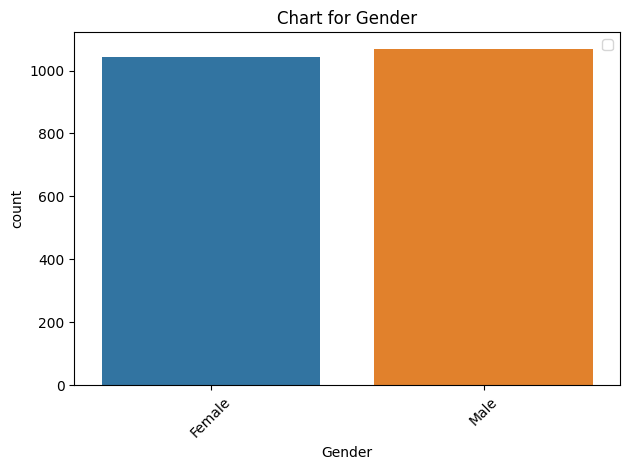

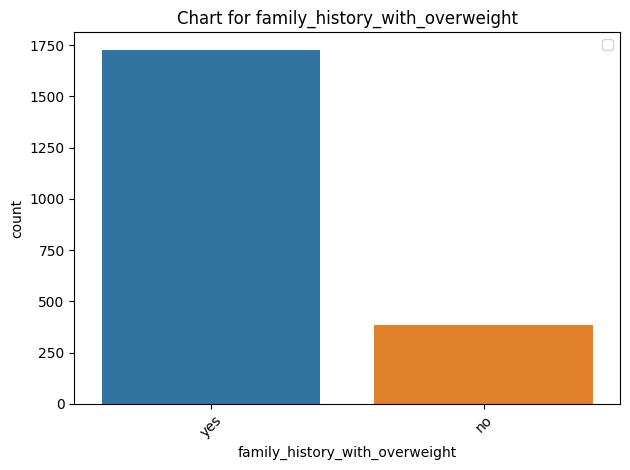

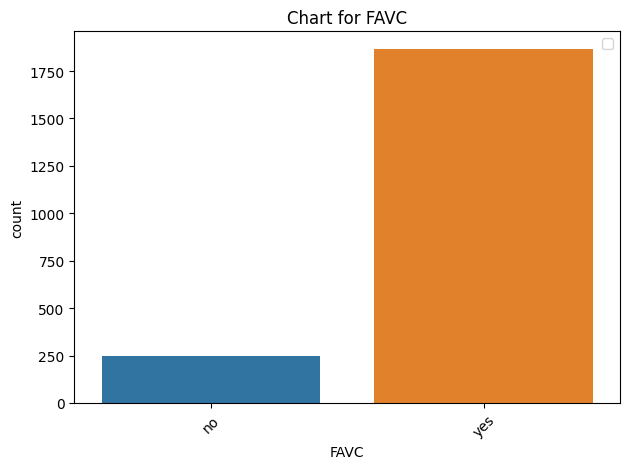

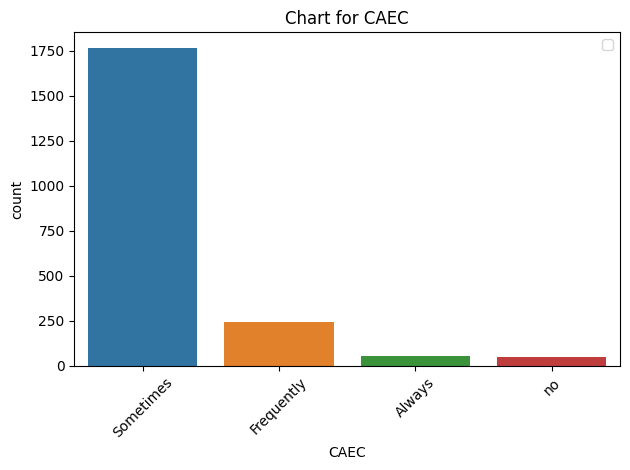

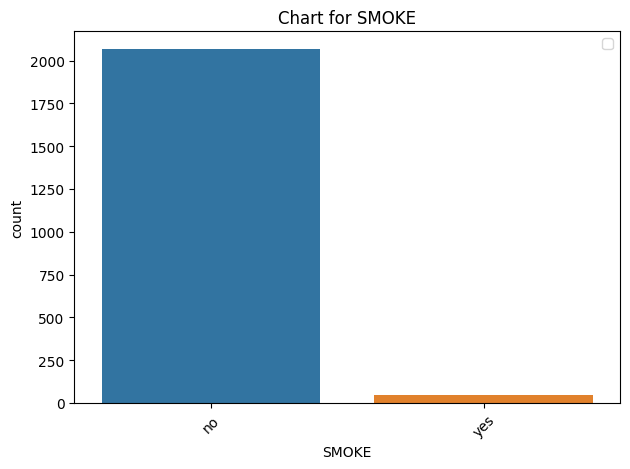

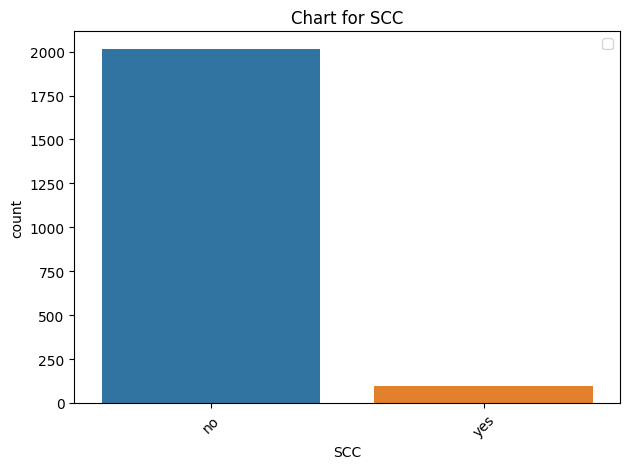

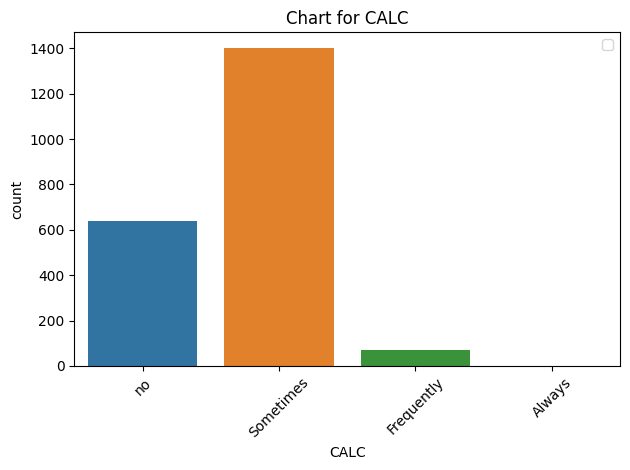

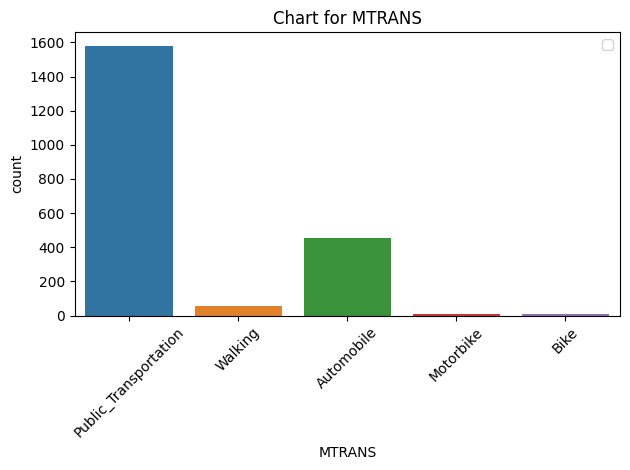

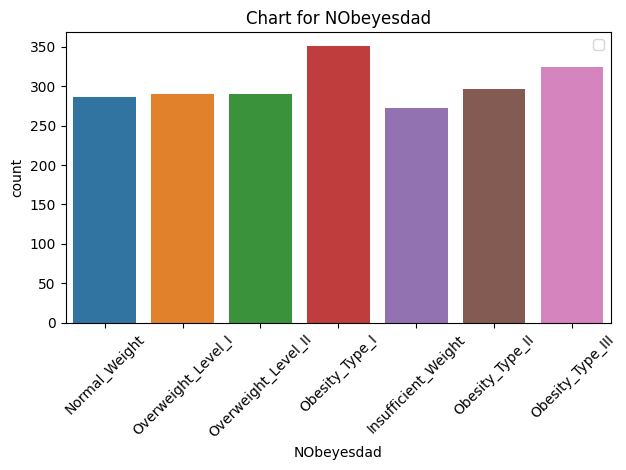

In [9]:
# Create bar plots
for col in categorical_cols:  
    sns.countplot(x=col, data=df)
    plt.title(f"Chart for {col}") 
    plt.xticks(rotation=45)  
    plt.legend()
    plt.tight_layout()
    plt.show()
        

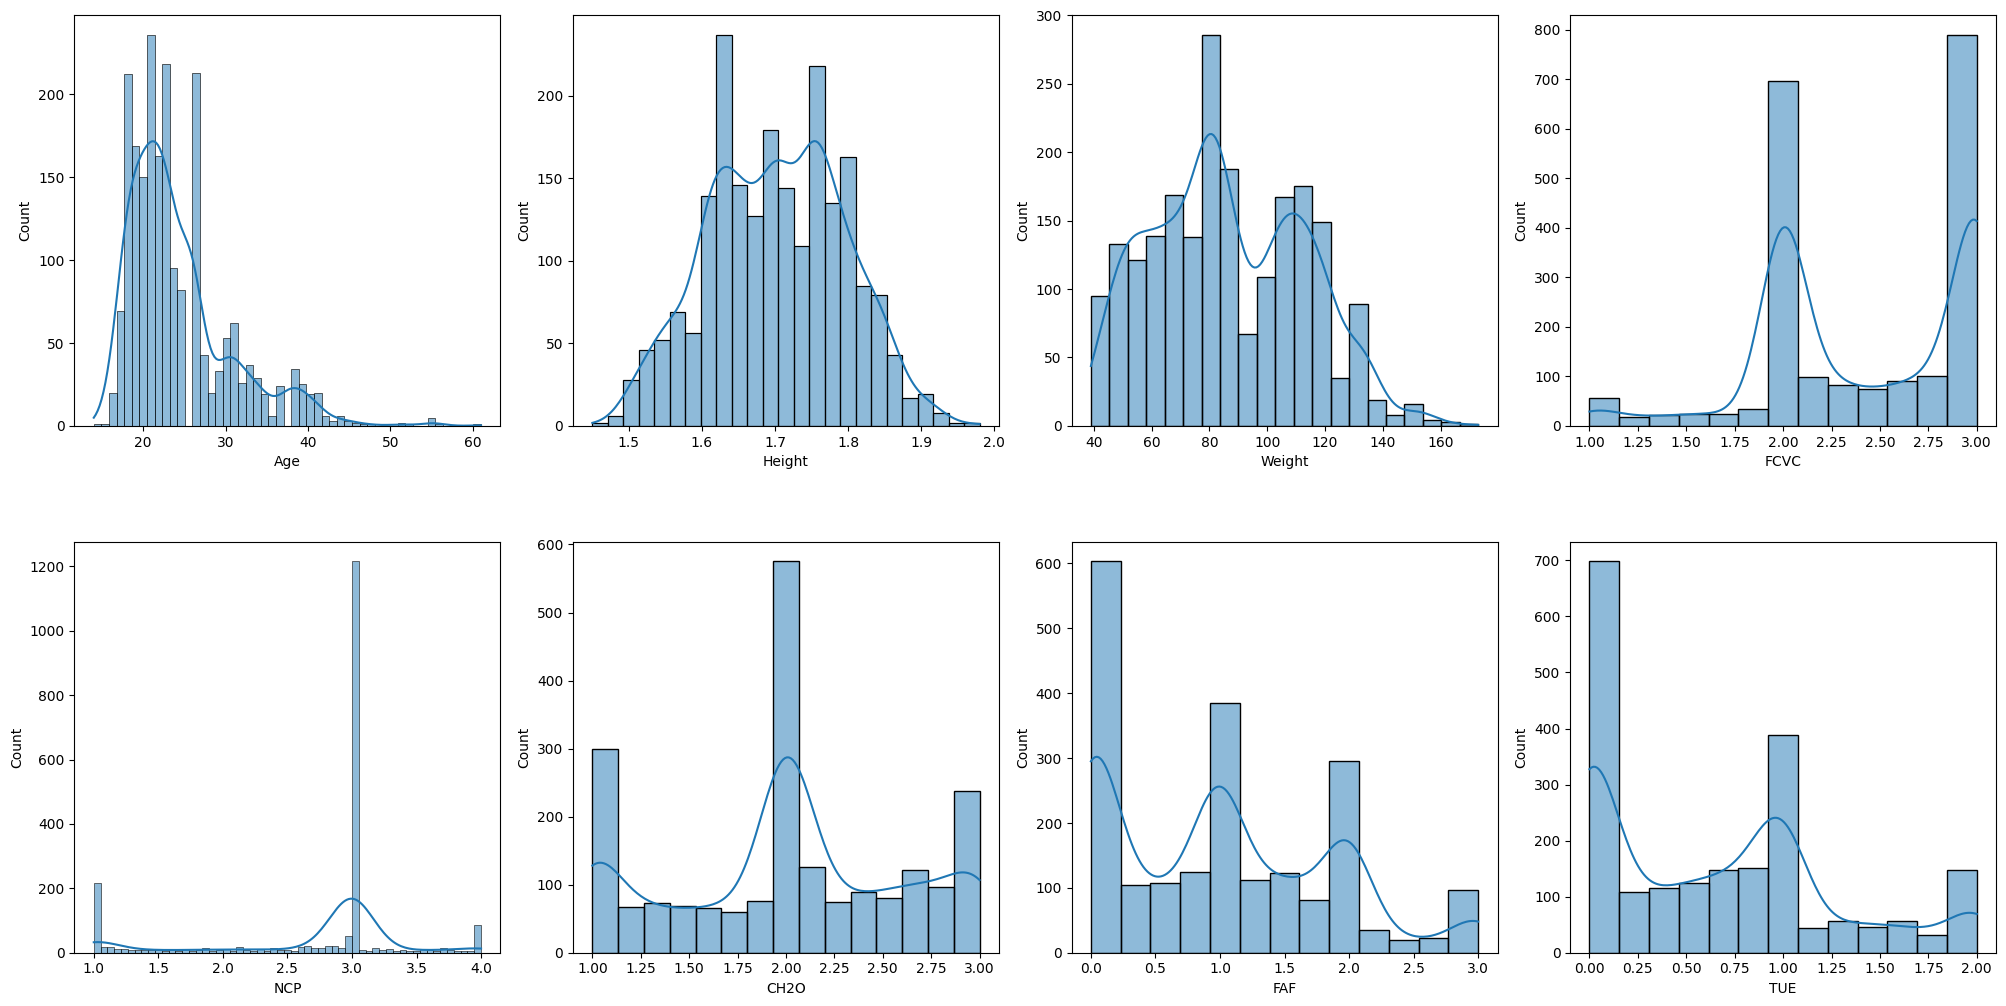

In [10]:
#Create the Histplot 

fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(20,10))
index = 0
ax =ax.flatten()

for col, value in df.select_dtypes(include=['int64', 'float64']).items():
    if col != 'type': 
        sns.histplot( value, ax= ax[index],kde=True)
        index += 1

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

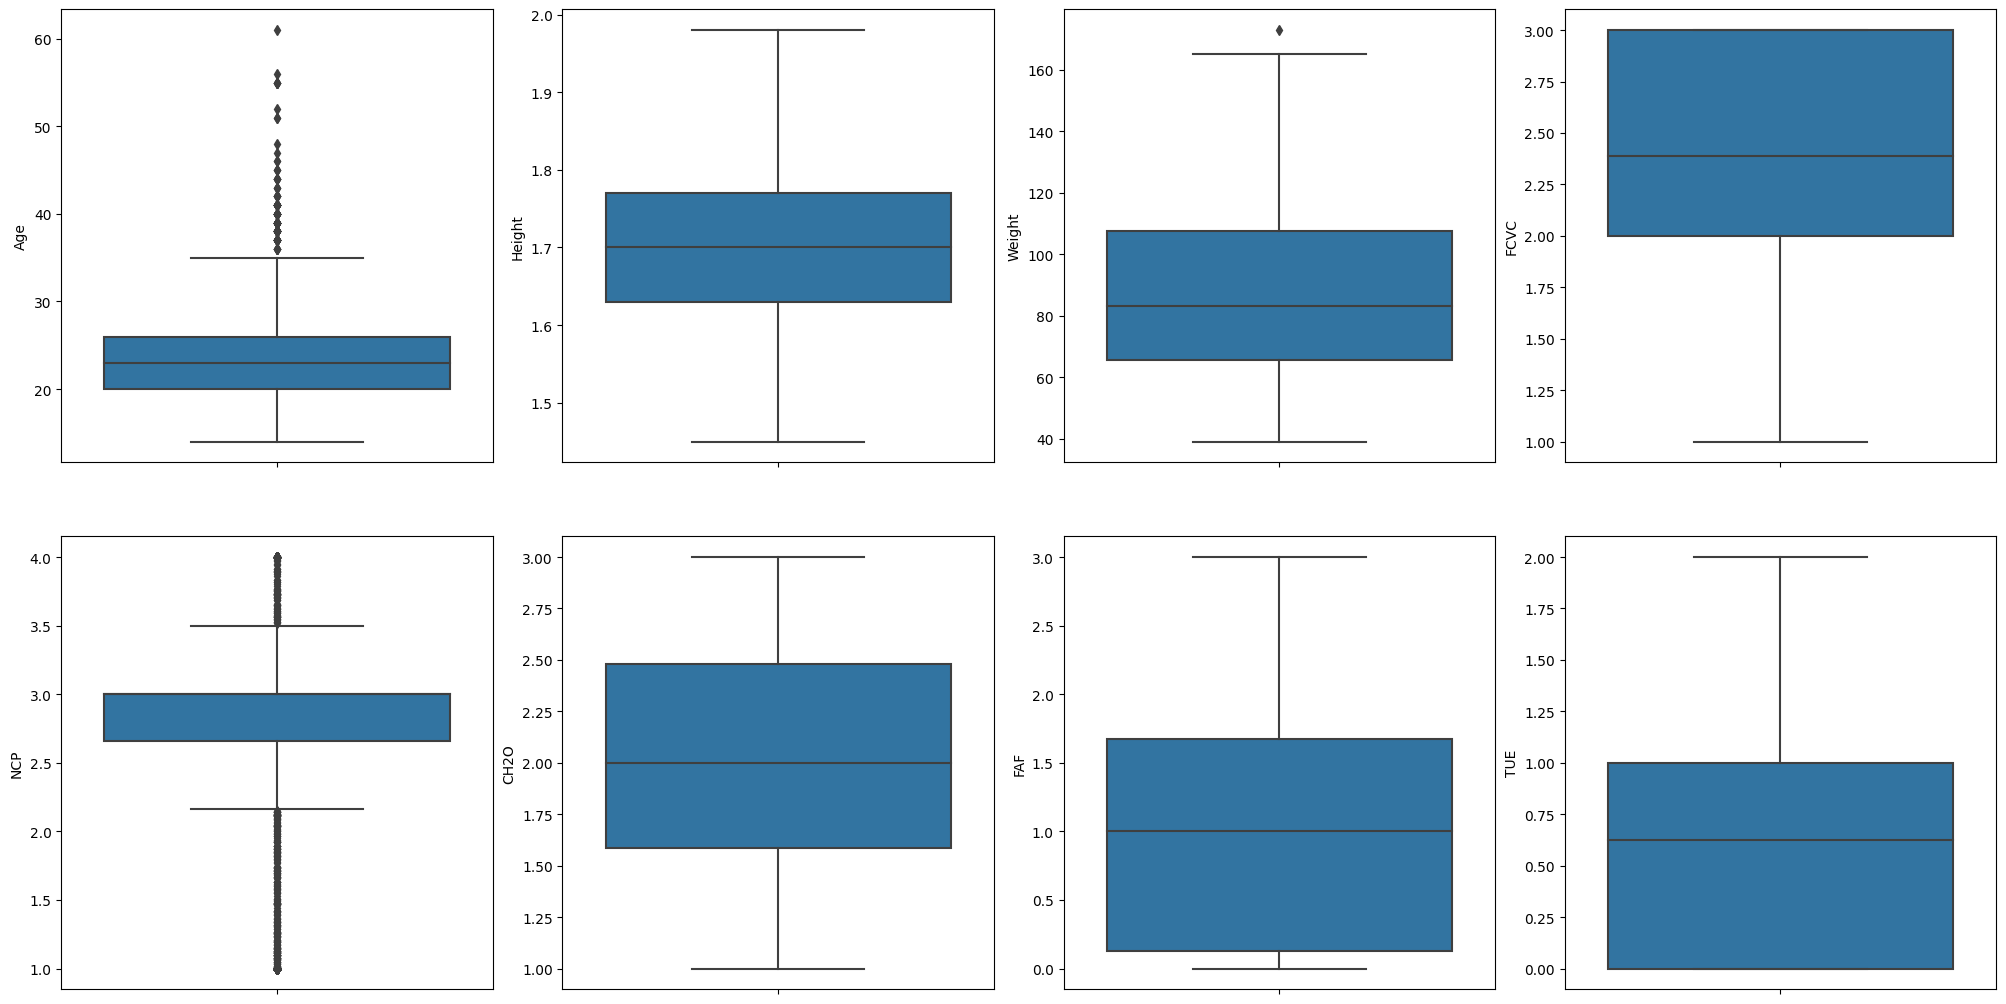

In [11]:
# Create box plots
fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(20,10))
index = 0
ax =ax.flatten()

for col, value in df.select_dtypes(include=['int64', 'float64']).items():
    if col != 'type': 
        sns.boxplot(y =col, data=df, ax= ax[index])
        index += 1

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

As per the Box Plots, its cleraly visible that there are outlier in the Age and NCP columns. So we need to remove the outliers. 

## Removing the outliers

In [12]:
features = [ 'Age','NCP']



for feature in features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Filter out outliers
    df = df[(df[feature] >= lower) & (df[feature] <= upper)]

## Coorelation Matrix

<Axes: >

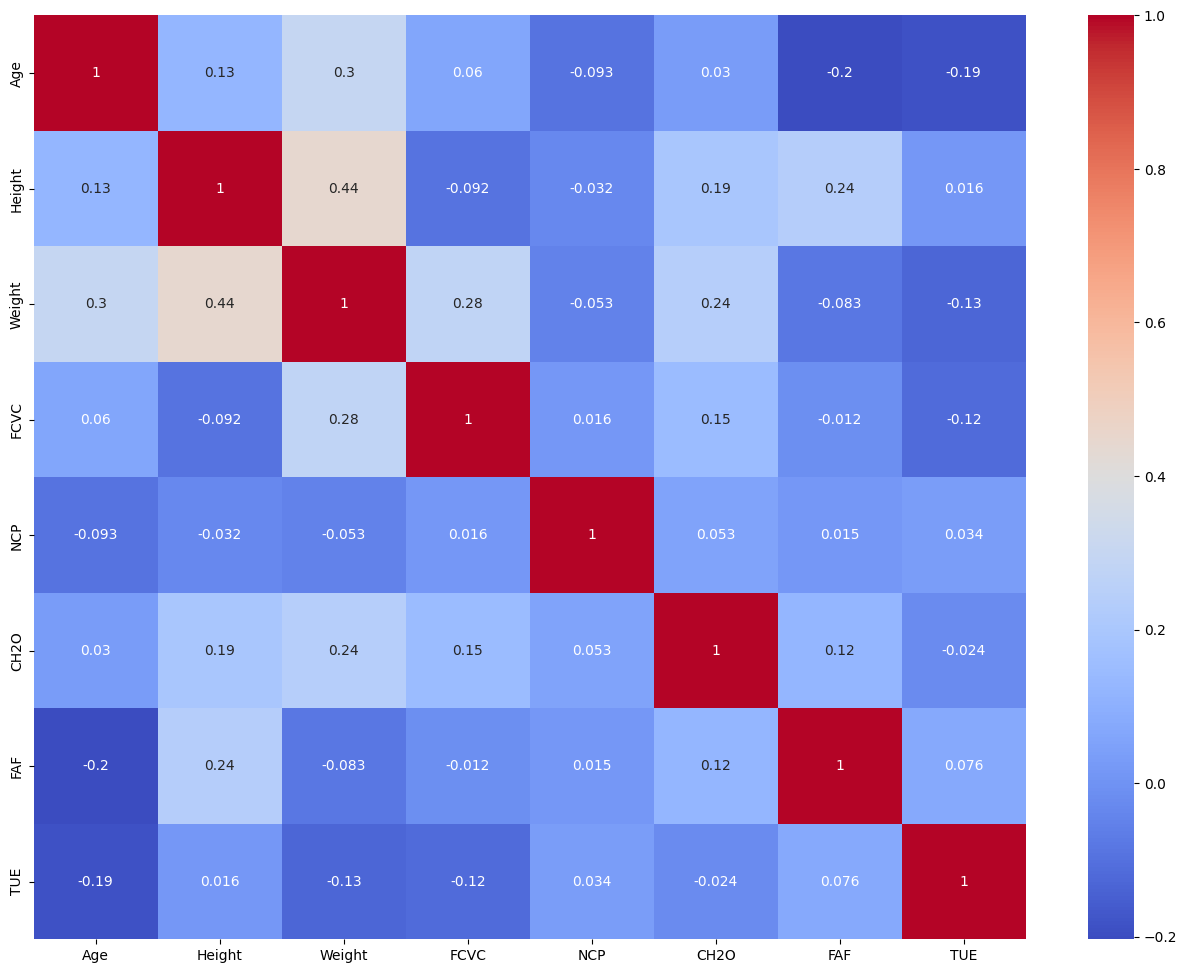

In [13]:
corr = df.corr(numeric_only= True )
plt.figure(figsize=(16,12))
sns.heatmap(corr,annot=True, cmap='coolwarm')

Coorelation Matrix indicates below. 

* Taller individuals tend to weigh more. There is a positvie correlation of 0.44. 
* Old people are doing less physical activity and more addicted to electronic device usage. Age vs TUE and FAF is having values -0.2 & -0.19. 


In [14]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [15]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
5,Male,29,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight


### Input split 

In [16]:
X = df.drop(columns=['NObeyesdad'])
X = pd.get_dummies(X) 
y = df['NObeyesdad']

## Model Training¶

In [17]:
# Classify function 
from sklearn.model_selection import cross_val_score, train_test_split
def classify(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
    # trina the model 
    model.fit(X_train, y_train)
    print("Accuracy :", model.score(X_test, y_test)*100)

    # Cross Validation 
    score = cross_val_score(model, X, y, cv =5)
    print("CV Score : ", np.mean(score)*100)

In [18]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression()
classify(model, X, y )

Accuracy : 76.70454545454545
CV Score :  72.81138790035588


In [19]:
# Decision Tree 
from sklearn.tree import DecisionTreeClassifier 
model = DecisionTreeClassifier()
classify(model, X, y )

Accuracy : 95.17045454545455
CV Score :  93.80782918149467


In [20]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier()
classify(model, X, y )

Accuracy : 94.88636363636364
CV Score :  93.02491103202847


In [21]:
# Extra Tree
from sklearn.ensemble import ExtraTreesClassifier 
model = ExtraTreesClassifier()
classify(model, X, y )

Accuracy : 92.61363636363636
CV Score :  89.6085409252669


In [22]:
# xgb
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb


le = LabelEncoder()
y_encoded = le.fit_transform(y)

model = xgb.XGBClassifier()
classify(model, X, y_encoded )

Accuracy : 96.30681818181817
CV Score :  95.37366548042705


In [23]:
#lgbm
import lightgbm
model = lightgbm.LGBMClassifier()
classify(model, X, y )

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003495 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1039
[LightGBM] [Info] Number of data points in the train set: 1053, number of used features: 27
[LightGBM] [Info] Start training from score -2.268051
[LightGBM] [Info] Start training from score -1.935518
[LightGBM] [Info] Start training from score -1.962186
[LightGBM] [Info] Start training from score -1.877994
[LightGBM] [Info] Start training from score -1.450010
[LightGBM] [Info] Start training from score -2.180275
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

## Conclution 

Clearly LightGBM  is the best model with Accuracy of 98.01 % and CV Score of 95.72%. Accuracy can be furhter improved by GridSearchCV or Optuna.